# Case study: parameter guideline process for fingerprinting

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [3]:
# german credit has 20 attributes; 4, 8, 12, 16, 20
# german credit has 1000 rows

In [4]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

## Vertical subset attack

In [5]:
# load robustness results
with open('parameter_guidelines/evaluation/german_credit/robustness_vertical_universal_c95_e100.pickle', 'rb') as infile:
    robustness_vertical_20attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_vertical_universal_c95_fpattr16_e100.pickle', 'rb') as infile:
    robustness_vertical_16attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_vertical_universal_c95_fpattr12_e100.pickle', 'rb') as infile:
    robustness_vertical_12attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_vertical_universal_c95_fpattr8_e100.pickle', 'rb') as infile:
    robustness_vertical_8attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_vertical_universal_c95_fpattr4_e100.pickle', 'rb') as infile:
    robustness_vertical_4attr = pickle.load(infile)

In [6]:
# load utility results
with open('parameter_guidelines/evaluation/german_credit/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_e80.pickle', 'rb') as infile:
    utility_fp_gb_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr16_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr16_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr12_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr12_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr8_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr8_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr4_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr4_e80 = pickle.load(infile)

In [7]:
# load attack utility loss resutls
with open('parameter_guidelines/evaluation/german_credit/rel_vertical_attack_utility_loss_gb_fpattr20.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr20 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_vertical_attack_utility_loss_gb_fpattr16.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr16 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_vertical_attack_utility_loss_gb_fpattr12.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr12 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_vertical_attack_utility_loss_gb_fpattr8.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr8 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_vertical_attack_utility_loss_gb_fpattr4.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr4 = pickle.load(infile)

In [8]:
# prep for plotting
robustness_vertical_x = 1.0 / np.array(list(robustness_vertical_20attr.keys())) # percentage of marked rows

robustness_vertical_20attr_y = robustness_vertical_20attr.values()
robustness_vertical_16attr_y = robustness_vertical_16attr.values()
robustness_vertical_12attr_y = robustness_vertical_12attr.values()
robustness_vertical_8attr_y = robustness_vertical_8attr.values()
robustness_vertical_4attr_y = robustness_vertical_4attr.values()

In [9]:
# prep for plotting
gb_baseline = np.mean(utility_ml_baseline['gb'])
gb_baseline_y = [gb_baseline for x in robustness_vertical_x] 

#utility_fp_gb_avg = dict()
#for gamma in utility_fp_gb:
#    utility_fp_gb_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb[gamma]])
#utility_fp_gb_avg_y = utility_fp_gb_avg.values() 

utility_fp_gb_e80_avg = dict()
for gamma in utility_fp_gb_e80:
    utility_fp_gb_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_e80[gamma]])
utility_fp_gb_e80_avg_y = utility_fp_gb_e80_avg.values() 

utility_fp_gb_fpattr16_e80_avg = dict()
for gamma in utility_fp_gb_fpattr16_e80:
    utility_fp_gb_fpattr16_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr16_e80[gamma]])
utility_fp_gb_fpattr16_e80_avg_y = utility_fp_gb_fpattr16_e80_avg.values() 

utility_fp_gb_fpattr12_e80_avg = dict()
for gamma in utility_fp_gb_fpattr12_e80:
    utility_fp_gb_fpattr12_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr12_e80[gamma]])
utility_fp_gb_fpattr12_e80_avg_y = utility_fp_gb_fpattr12_e80_avg.values() 

utility_fp_gb_fpattr8_e80_avg = dict()
for gamma in utility_fp_gb_fpattr8_e80:
    utility_fp_gb_fpattr8_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr8_e80[gamma]])
utility_fp_gb_fpattr8_e80_avg_y = utility_fp_gb_fpattr8_e80_avg.values()

utility_fp_gb_fpattr4_e80_avg = dict()
for gamma in utility_fp_gb_fpattr4_e80:
    utility_fp_gb_fpattr4_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr4_e80[gamma]])
utility_fp_gb_fpattr4_e80_avg_y = utility_fp_gb_fpattr4_e80_avg.values()

In [10]:
# prep for plotting
attack_utility_loss_fp_attr20_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr20[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr20]
attack_utility_loss_fp_attr16_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr16[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr16]
attack_utility_loss_fp_attr12_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr12[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr12]
attack_utility_loss_fp_attr8_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr8[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr8]
attack_utility_loss_fp_attr4_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr4[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr4]
utility_loss_x = [1, 0.5, 0.3333, 0.25, 0.2, 0.1667, 0.14285714, 0.125, 0.11111111, 0.1, 0.08333333, 0.06666667, 0.05555556]

In [11]:
attack_utility_loss_fp_attr16_mean

[8.269829143889071,
 6.767322736649514,
 6.19008199787725,
 6.199543145007589,
 5.598871611318304,
 6.613585599575603,
 5.438234860744419,
 5.229958748490916,
 4.9646243878331715,
 4.625863466112486,
 4.343961789683289,
 4.118051330035966,
 3.0430161641973976,
 2.7677741124500557,
 3.270297848064961,
 2.369744310689845,
 1.8139632943853654,
 0.591013161532742]

In [12]:
len(robustness_vertical_x)

18

Text(0.5, 1.0, 'Utility loss after applying the weakest successful attack')

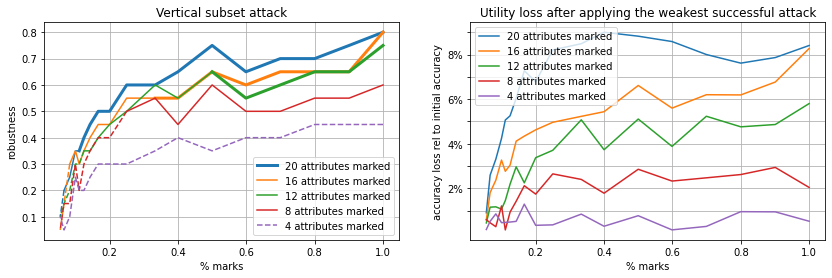

In [13]:
#plt.plot(horizontal_x, utility_line_2, color='#ffe3e3', label='attacker loses >1% of acc')
#plt.fill_between(horizontal_x, [0.81 for i in horizontal_x], utility_line_2, color='#ffe3e3')

#plt.plot(horizontal_x, utility_line, color='#ffabab', label='attacker loses >2% of acc')#
#plt.fill_between(horizontal_x, [0.81 for i in horizontal_x], utility_line, color='#ffabab')
fig, axs = plt.subplots(1,2, figsize=(14,4))

# ROBUSTNESS PLOT
axs[0].plot(robustness_vertical_x[16:], list(robustness_vertical_20attr_y)[16:], '--', color=colors[0])
axs[0].plot(robustness_vertical_x[13:17], list(robustness_vertical_20attr_y)[13:17], color=colors[0])
axs[0].plot(robustness_vertical_x[:14], list(robustness_vertical_20attr_y)[:14], color=colors[0], linewidth=3, label='20 attributes marked')  # 20/20 attributes marked by the fingerprint

axs[0].plot(robustness_vertical_x[15:], list(robustness_vertical_16attr_y)[15:], '--', color=colors[1])
axs[0].plot(robustness_vertical_x[7:16], list(robustness_vertical_16attr_y)[7:16], color=colors[1], label='16 attributes marked')
axs[0].plot(robustness_vertical_x[:8], list(robustness_vertical_16attr_y)[:8], linewidth=3, color=colors[1])

axs[0].plot(robustness_vertical_x[12:], list(robustness_vertical_12attr_y)[12:], '--', color=colors[2])
axs[0].plot(robustness_vertical_x[5:13], list(robustness_vertical_12attr_y)[5:13], color=colors[2], label='12 attributes marked')
axs[0].plot(robustness_vertical_x[:6], list(robustness_vertical_12attr_y)[:6], linewidth=3, color=colors[2])

axs[0].plot(robustness_vertical_x[8:], list(robustness_vertical_8attr_y)[8:], '--', color=colors[3])
axs[0].plot(robustness_vertical_x[:9], list(robustness_vertical_8attr_y)[:9], color=colors[3], label='8 attributes marked')  # 8 values are <2% and then more

axs[0].plot(robustness_vertical_x, robustness_vertical_4attr_y, '--', color=colors[4], label='4 attributes marked')

axs[0].set_xlabel('% marks')
axs[0].set_ylabel('robustness')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Vertical subset attack')

# UTILITY PLOT
#axs[1].plot(robustness_vertical_x, utility_fp_gb_avg_y, label='20 attributes marked')
#axs[1].plot(robustness_vertical_x, utility_fp_gb_e80_avg_y, label='20 attributes marked')
#axs[1].plot(robustness_vertical_x, utility_fp_gb_fpattr16_e80_avg_y, label='16 attributes marked') 
#axs[1].plot(robustness_vertical_x, utility_fp_gb_fpattr12_e80_avg_y, label='12 attributes marked')
#axs[1].plot(robustness_vertical_x, utility_fp_gb_fpattr8_e80_avg_y, label='8 attributes marked')
#axs[1].plot(robustness_vertical_x, utility_fp_gb_fpattr4_e80_avg_y, label='4 attributes marked')



#axs[1].plot(robustness_vertical_x, gb_baseline_y, label='GB baseline')

#axs[1].set_xlabel('% marks')
#axs[1].set_ylabel('accuracy')
#axs[1].legend()
#axs[1].grid()
#axs[1].set_title('Utility loss due to the fingerprint')

# ATTACK UTILITY LOSS PLOT
axs[1].plot(robustness_vertical_x, attack_utility_loss_fp_attr20_mean, label='20 attributes marked')
axs[1].plot(robustness_vertical_x, attack_utility_loss_fp_attr16_mean, label='16 attributes marked')
axs[1].plot(robustness_vertical_x, attack_utility_loss_fp_attr12_mean, label='12 attributes marked')
axs[1].plot(robustness_vertical_x, attack_utility_loss_fp_attr8_mean, label='8 attributes marked')
axs[1].plot(robustness_vertical_x, attack_utility_loss_fp_attr4_mean, label='4 attributes marked')

axs[1].set_yticks([1,2,3,4,5,6,7,8,9])
axs[1].set_yticklabels(['','2%','', '4%','','6%','', '8%',''])
axs[1].set_xlabel('% marks')
axs[1].set_ylabel('accuracy loss rel to initial accuracy')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Utility loss after applying the weakest successful attack')

What to plot next?
Data holder perspective: I want to maximise the robustness, so obviously I will choose a blue line, i.e. mark all 20 attributes and do it with 100% of marks. However, looking at the results from the flipping attack, marking more attributes will help the attacker, so we want to minimise this parameter. Obviously we will at the end go with some middle ground such as 16, 12.
In addition to the attack, maybe some "less robust" settings are still robust due to the utility that the attacker loses due to the attack. We need to visualise this somehow. 

Let's take the blue line, 20 attributes marked: if we mark 10% of the data, the attacker can delete up to 35% of the columns and leave the fingerprint intacked. But how much does the attacker use on the utility here? It's likely less than 1%, so attacker can find this ok and attack. If they delete more, they still don't lose on the accuracy but remove the fingerprint. That's why at this point in parameter space, the scheme is not robust. 
Further, let's see the example of some parameter setup (still the blue line), e.g. [20 attr, 60% marks]. The robustness here is 75%, i.e. the attacker can remove up to 75% of columns and not affect the fingerprint. So they would need to remove at least 76% of the columns, however what is their utility here then? 
Likely significant -- for the picture let's say it's 3%, which is unacceptable for releasing such data. So, what we would need for this point in parameter space is to see where it exceeds some utility loss level, eg. 2% loss in accuracy in the best performing classifier. 
So the idea is to obtain an additional like that will follow the robustness line until the robustness starts having unacceptable utility, e.g. less than 2% drop in accuracy. After that point we the line continues on the robustness level where the drop is below this treshold. 

*Scratch that. *

**The line stays the same; I make it dashed until the point that the attacker loses more than 1% in accuracy; and then I can additionally add bolded line where the accuracy drops more than 2%.**

*For all of this I need to obtain utility of the fingeprinted data to actually calculate the additional loss due to the attacks.*

Therefore:
- define a set of baseline classifiers; let them have the package default hyperparameters --> (lr, gb, knn, dt)
- calculate the original accuracy for unmarked dataset for each classifier
- choose the best performing classifier --> gb with avg over 5 folds 0.759
- for each param setting [#attributes_marked, %marks] --> this is 5*13 = 65 settings
    - calculate the baseline accuracy of the fingerprinted dataset for that setting (adapted cross validation from the toolbox)
    - take the strongest attack that doesn't delete the fingerpint (i.e. robustness)
    - perform attack
    - obtain the new accuracy (also cross val)

**note to self: I stopped at calc baseline acc of the fingerprinted ds -- so check the code and run the exp**

The results on the right-hand side are not expected. Seems like with fingerprinting less columns, we actually obtain worse accuracy, and the opposite would be expected. This might be due to the type of attributes we are marking and the fact that all marks are accumulated in these few attributes as opposed to spread among the columns. These results migth be different if we actually choose the least important features for fingerprinting. On the other hand, choosing such features might help the attacker to erase the fingerprint, i.e. target the least important features for verical subset attack.


The right-hand side plot is not specific for the attack -- it is a general utility loss due to fingerprinting. This belongs to Utility section. In addition, the changes in statistics should be added and perhaps the results from other classifiers for the full picture.

- Dashed line: the attacker loses up to 2% of the initial classification accuracy on the best classifier
- Normal line: the attacker loses up to 5% of the initial classification accuracy on the best classifier
- Bolded line: the attacker loses more than 5% of the initial classification accuracy on the best classifier

In [14]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

## Horizontal subset attack

In [15]:
# load results
with open('parameter_guidelines/evaluation/german_credit/robustness_horizontal_universal_c95_ag05_fpattr20_e100.pickle', 'rb') as infile:
    robustness_horizontal_20attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_horizontal_universal_c95_ag05_fpattr16_e100.pickle', 'rb') as infile:
    robustness_horizontal_16attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_horizontal_universal_c95_ag05_fpattr12_e100.pickle', 'rb') as infile:
    robustness_horizontal_12attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_horizontal_universal_c95_ag05_fpattr8_e100.pickle', 'rb') as infile:
    robustness_horizontal_8attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_horizontal_universal_c95_ag05_fpattr4_e100.pickle', 'rb') as infile:
    robustness_horizontal_4attr = pickle.load(infile)

In [16]:
# load attack utility loss resutls
with open('parameter_guidelines/evaluation/german_credit/rel_horizontal_attack_utility_loss_gb_fpattr20.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr20 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_horizontal_attack_utility_loss_gb_fpattr16.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr16 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_horizontal_attack_utility_loss_gb_fpattr12.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr12 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_horizontal_attack_utility_loss_gb_fpattr8.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr8 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_horizontal_attack_utility_loss_gb_fpattr4.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr4 = pickle.load(infile)

In [17]:
# prep for plotting
robustness_horizontal_x = 1.0 / np.array(list(robustness_horizontal_20attr.keys())) # percentage of marked rows

robustness_horizontal_20attr_y = robustness_horizontal_20attr.values()
robustness_horizontal_16attr_y = robustness_horizontal_16attr.values()
robustness_horizontal_12attr_y = robustness_horizontal_12attr.values()
robustness_horizontal_8attr_y = robustness_horizontal_8attr.values()
robustness_horizontal_4attr_y = robustness_horizontal_4attr.values()

In [18]:
# prep for plotting
attack_utility_loss_fp_attr20_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr20[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr20]
attack_utility_loss_fp_attr16_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr16[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr16]
attack_utility_loss_fp_attr12_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr12[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr12]
attack_utility_loss_fp_attr8_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr8[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr8]
attack_utility_loss_fp_attr4_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr4[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr4]

In [19]:
attack_utility_loss_fp_attr4_mean

[12.936866361457039,
 12.565369692212295,
 13.027543778855225,
 13.555770492403624,
 11.88007190854656,
 12.119018126510134,
 11.344707249664786,
 11.647193705517777,
 8.082082143976121,
 8.72452548419848,
 6.289268355522575,
 5.532434902087041,
 4.570327688586294,
 3.88951113658913,
 4.6474601153629305,
 3.6028981862109886,
 4.747023510294558,
 1.6484750784568913]

Text(0.5, 1.0, 'Utility loss after applying the weakest successful attack')

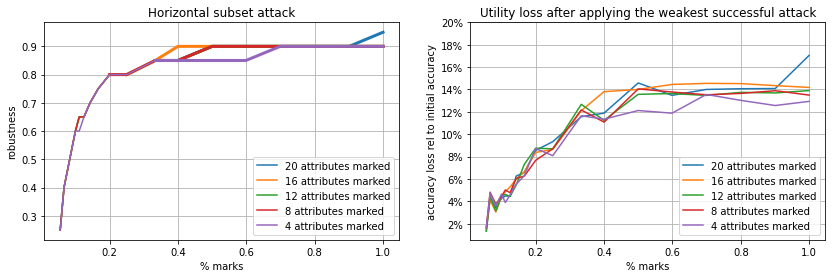

In [20]:
#plt.plot(horizontal_x, utility_line_2, color='#ffe3e3', label='attacker loses >1% of acc')
#plt.fill_between(horizontal_x, [0.81 for i in horizontal_x], utility_line_2, color='#ffe3e3')

#plt.plot(horizontal_x, utility_line, color='#ffabab', label='attacker loses >2% of acc')#
#plt.fill_between(horizontal_x, [0.81 for i in horizontal_x], utility_line, color='#ffabab')
fig, axs = plt.subplots(1,2, figsize=(14,4))

# ROBUSTNESS PLOT
axs[0].plot(robustness_horizontal_x[7:], list(robustness_horizontal_20attr_y)[7:], color=colors[0], label='20 attributes marked')  # 20/20 attributes marked by the fingerprint
axs[0].plot(robustness_horizontal_x[:8], list(robustness_horizontal_20attr_y)[:8], linewidth=3, color=colors[0])

axs[0].plot(robustness_horizontal_x[8:], list(robustness_horizontal_16attr_y)[8:], color=colors[1], label='16 attributes marked')
axs[0].plot(robustness_horizontal_x[:9], list(robustness_horizontal_16attr_y)[:9], linewidth=3, color=colors[1]) 
            
axs[0].plot(robustness_horizontal_x[7:], list(robustness_horizontal_12attr_y)[7:], color=colors[2], label='12 attributes marked')
axs[0].plot(robustness_horizontal_x[:8], list(robustness_horizontal_12attr_y)[:8], linewidth=3, color=colors[2])

axs[0].plot(robustness_horizontal_x[9:], list(robustness_horizontal_8attr_y)[9:], color=colors[3], label='8 attributes marked')
axs[0].plot(robustness_horizontal_x[:10], list(robustness_horizontal_8attr_y)[:10], linewidth=3, color=colors[3])

axs[0].plot(robustness_horizontal_x[7:], list(robustness_horizontal_4attr_y)[7:], color=colors[4], label='4 attributes marked')
axs[0].plot(robustness_horizontal_x[:8], list(robustness_horizontal_4attr_y)[:8], linewidth=3, color=colors[4])

axs[0].set_xlabel('% marks')
axs[0].set_ylabel('robustness')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Horizontal subset attack')

# ATTACK UTILITY LOSS PLOT
axs[1].plot(robustness_horizontal_x, attack_utility_loss_fp_attr20_mean, label='20 attributes marked')
axs[1].plot(robustness_horizontal_x, attack_utility_loss_fp_attr16_mean, label='16 attributes marked')
axs[1].plot(robustness_horizontal_x, attack_utility_loss_fp_attr12_mean, label='12 attributes marked')
axs[1].plot(robustness_horizontal_x, attack_utility_loss_fp_attr8_mean, label='8 attributes marked')
axs[1].plot(robustness_horizontal_x, attack_utility_loss_fp_attr4_mean, label='4 attributes marked')

axs[1].set_yticks([2,4,6,8,10,12, 14, 16, 18, 20])
axs[1].set_yticklabels(['2%','4%','6%', '8%','10%','12%','14%', '16%','18%', '20%'])
axs[1].set_xlabel('% marks')
axs[1].set_ylabel('accuracy loss rel to initial accuracy')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Utility loss after applying the weakest successful attack')

# Flipping attack

In [65]:
# load results
with open('parameter_guidelines/evaluation/german_credit/robustness_flipping_universal_c95_ag05_fpattr20_e100.pickle', 'rb') as infile:
    robustness_flipping_20attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_flipping_universal_c95_ag05_fpattr16_e100.pickle', 'rb') as infile:
    robustness_flipping_16attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_flipping_universal_c95_ag05_fpattr12_e100.pickle', 'rb') as infile:
    robustness_flipping_12attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_flipping_universal_c95_ag05_fpattr8_e100.pickle', 'rb') as infile:
    robustness_flipping_8attr = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/robustness_flipping_universal_c95_ag05_fpattr4_e100.pickle', 'rb') as infile:
    robustness_flipping_4attr = pickle.load(infile)

In [66]:
# load attack utility loss resutls
with open('parameter_guidelines/evaluation/german_credit/rel_flipping_attack_utility_loss_gb_fpattr20.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr20 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_flipping_attack_utility_loss_gb_fpattr16.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr16 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_flipping_attack_utility_loss_gb_fpattr12.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr12 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_flipping_attack_utility_loss_gb_fpattr8.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr8 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/rel_flipping_attack_utility_loss_gb_fpattr4.pickle', 'rb') as infile:
    attack_utility_loss_fp_attr4 = pickle.load(infile)

In [67]:
# prep for plotting
robustness_flipping_x = 1.0 / np.array(list(robustness_flipping_20attr.keys())) # percentage of marked rows

robustness_flipping_20attr_y = robustness_flipping_20attr.values()
robustness_flipping_16attr_y = robustness_flipping_16attr.values()
robustness_flipping_12attr_y = robustness_flipping_12attr.values()
robustness_flipping_8attr_y = robustness_flipping_8attr.values()
robustness_flipping_4attr_y = robustness_flipping_4attr.values()

In [68]:
# prep for plotting
attack_utility_loss_fp_attr20_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr20[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr20]
attack_utility_loss_fp_attr16_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr16[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr16]
attack_utility_loss_fp_attr12_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr12[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr12]
attack_utility_loss_fp_attr8_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr8[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr8]
attack_utility_loss_fp_attr4_mean = [abs(np.mean([np.mean(util) for util in attack_utility_loss_fp_attr4[gamma]]))*100 for gamma in 
                                      attack_utility_loss_fp_attr4]

attack_utility_loss_x = [1.0, 0.5, 0.3333, 0.25, 0.2, 0.1666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.08333333, 0.06666667, 0.05555556]

In [69]:
robustness_flipping_x

array([1.        , 0.9009009 , 0.8       , 0.6993007 , 0.5988024 ,
       0.5       , 0.4       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.08333333, 0.06666667, 0.05555556])

Text(0.5, 1.0, 'Utility loss after applying the weakest successful attack')

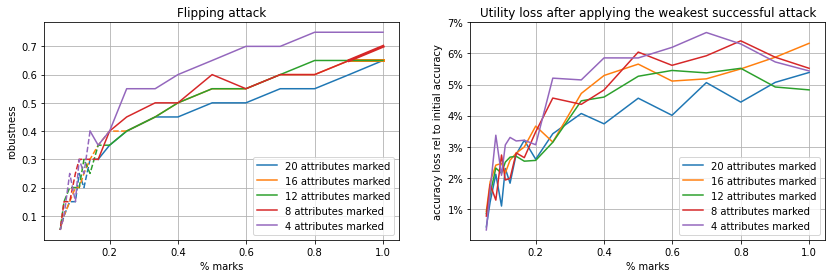

In [70]:
#plt.plot(horizontal_x, utility_line_2, color='#ffe3e3', label='attacker loses >1% of acc')
#plt.fill_between(horizontal_x, [0.81 for i in horizontal_x], utility_line_2, color='#ffe3e3')

#plt.plot(horizontal_x, utility_line, color='#ffabab', label='attacker loses >2% of acc')#
#plt.fill_between(horizontal_x, [0.81 for i in horizontal_x], utility_line, color='#ffabab')
fig, axs = plt.subplots(1,2, figsize=(14,4))

# ROBUSTNESS PLOT
axs[0].plot(robustness_flipping_x[10:], list(robustness_flipping_20attr_y)[10:], '--', color=colors[0])
axs[0].plot(robustness_flipping_x[:11], list(robustness_flipping_20attr_y)[:11], color=colors[0], label='20 attributes marked')  # 20/20 attributes marked by the fingerprint

axs[0].plot(robustness_flipping_x[8:], list(robustness_flipping_16attr_y)[8:], '--', color=colors[1])
axs[0].plot(robustness_flipping_x[:9], list(robustness_flipping_16attr_y)[:9], color=colors[1], label='16 attributes marked')
axs[0].plot(robustness_flipping_x[:2], list(robustness_flipping_16attr_y)[:2], linewidth=3, color=colors[1])

axs[0].plot(robustness_flipping_x[9:], list(robustness_flipping_12attr_y)[9:], '--', color=colors[2])
axs[0].plot(robustness_flipping_x[:10], list(robustness_flipping_12attr_y)[:10], color=colors[2], label='12 attributes marked')

axs[0].plot(robustness_flipping_x[10:], list(robustness_flipping_8attr_y)[10:], '--', color=colors[3])
axs[0].plot(robustness_flipping_x[:11], list(robustness_flipping_8attr_y)[:11], color=colors[3], label='8 attributes marked')
axs[0].plot(robustness_flipping_x[:2], list(robustness_flipping_8attr_y)[:2], linewidth=3, color=colors[3])

axs[0].plot(robustness_flipping_x[11:], list(robustness_flipping_4attr_y)[11:], '--', color=colors[4])
axs[0].plot(robustness_flipping_x[:12], list(robustness_flipping_4attr_y)[:12], color=colors[4], label='4 attributes marked')

axs[0].set_xlabel('% marks')
axs[0].set_ylabel('robustness')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Flipping attack')

# ATTACK UTILITY LOSS PLOT
axs[1].plot(robustness_flipping_x, attack_utility_loss_fp_attr20_mean, label='20 attributes marked')
axs[1].plot(robustness_flipping_x, attack_utility_loss_fp_attr16_mean, label='16 attributes marked')
axs[1].plot(robustness_flipping_x, attack_utility_loss_fp_attr12_mean, label='12 attributes marked')
axs[1].plot(robustness_flipping_x, attack_utility_loss_fp_attr8_mean, label='8 attributes marked')
axs[1].plot(robustness_flipping_x, attack_utility_loss_fp_attr4_mean, label='4 attributes marked')

axs[1].set_yticks([1,2,3,4,5,6, 7])
axs[1].set_yticklabels(['1%','2%','3%', '4%','5%','6%', '7%'])
axs[1].set_xlabel('% marks')
axs[1].set_ylabel('accuracy loss rel to initial accuracy')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Utility loss after applying the weakest successful attack')

The flipping attack is actually less successful if I mark less attributes. -- Does this make sense? Well, statistically, if I mark less attributes, the random flipper will "miss" a lot more than if all the attributes contained a mark. 

At the end of the day, for giving explicit decisions on parameter setting, one needs to model the utility vs robustness trade-off. This is our future work. For now, we are focusing on providing an informed environment for parameter selection, presenting the effects that each parameter choice will have on robustness and utility. 

## Utility

In [110]:
# load utility results
# gradient boosting
with open('parameter_guidelines/evaluation/german_credit/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_e80.pickle', 'rb') as infile:
    utility_fp_gb_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr16_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr16_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr12_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr12_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr8_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr8_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_gb_fpattr4_e80.pickle', 'rb') as infile:
    utility_fp_gb_fpattr4_e80 = pickle.load(infile)
    
# knn
with open('parameter_guidelines/evaluation/german_credit/utility_ml_baseline.pickle', 'rb') as infile:
    utility_ml_baseline = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_knn_fpattr20_e80.pickle', 'rb') as infile:
    utility_fp_knn_fp_attr20_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_knn_fpattr16_e80.pickle', 'rb') as infile:
    utility_fp_knn_fpattr16_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_knn_fpattr12_e80.pickle', 'rb') as infile:
    utility_fp_knn_fpattr12_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_knn_fpattr8_e80.pickle', 'rb') as infile:
    utility_fp_knn_fpattr8_e80 = pickle.load(infile)
with open('parameter_guidelines/evaluation/german_credit/utility_fp_knn_fpattr4_e80.pickle', 'rb') as infile:
    utility_fp_knn_fpattr4_e80 = pickle.load(infile)

In [111]:
utility_fp_gb_e80.keys()

dict_keys([1, 1.11, 1.25, 1.43, 1.67, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18])

In [112]:
# prep for plotting
x = 1.0 / np.array(list(utility_fp_gb_e80.keys())) # percentage of marked rows

# baselines
gb_baseline = np.mean(utility_ml_baseline['gb'])
gb_baseline_y = [gb_baseline for x_i in x] 
lr_baseline = np.mean(utility_ml_baseline['lr'])
lr_baseline_y = [lr_baseline for x_i in x]
knn_baseline = np.mean(utility_ml_baseline['knn'])
knn_baseline_y = [knn_baseline for x_i in x]

# gradient boosting
utility_fp_gb_e80_avg = dict()
for gamma in utility_fp_gb_e80:
    utility_fp_gb_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_e80[gamma]])
utility_fp_gb_e80_avg_y = utility_fp_gb_e80_avg.values() 

utility_fp_gb_fpattr16_e80_avg = dict()
for gamma in utility_fp_gb_fpattr16_e80:
    utility_fp_gb_fpattr16_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr16_e80[gamma]])
utility_fp_gb_fpattr16_e80_avg_y = utility_fp_gb_fpattr16_e80_avg.values() 

utility_fp_gb_fpattr12_e80_avg = dict()
for gamma in utility_fp_gb_fpattr12_e80:
    utility_fp_gb_fpattr12_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr12_e80[gamma]])
utility_fp_gb_fpattr12_e80_avg_y = utility_fp_gb_fpattr12_e80_avg.values() 

utility_fp_gb_fpattr8_e80_avg = dict()
for gamma in utility_fp_gb_fpattr8_e80:
    utility_fp_gb_fpattr8_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr8_e80[gamma]])
utility_fp_gb_fpattr8_e80_avg_y = utility_fp_gb_fpattr8_e80_avg.values()

utility_fp_gb_fpattr4_e80_avg = dict()
for gamma in utility_fp_gb_fpattr4_e80:
    utility_fp_gb_fpattr4_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_gb_fpattr4_e80[gamma]])
utility_fp_gb_fpattr4_e80_avg_y = utility_fp_gb_fpattr4_e80_avg.values()

# logistic regression
#utility_fp_lr_e80_avg = dict()
#for gamma in utility_fp_lr_fp_attr20_e80:
#    utility_fp_lr_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_lr_fp_attr20_e80[gamma]])
#utility_fp_lr_e80_avg_y = utility_fp_lr_e80_avg.values() 

#utility_fp_lr_fpattr16_e80_avg = dict()
#for gamma in utility_fp_lr_fpattr16_e80:
#    utility_fp_lr_fpattr16_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_lr_fpattr16_e80[gamma]])
#utility_fp_lr_fpattr16_e80_avg_y = utility_fp_lr_fpattr16_e80_avg.values() 

#utility_fp_lr_fpattr12_e80_avg = dict()
#for gamma in utility_fp_lr_fpattr12_e80:
#    utility_fp_lr_fpattr12_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_lr_fpattr12_e80[gamma]])
#utility_fp_lr_fpattr12_e80_avg_y = utility_fp_lr_fpattr12_e80_avg.values() 

#utility_fp_lr_fpattr8_e80_avg = dict()
#for gamma in utility_fp_lr_fpattr8_e80:
#    utility_fp_lr_fpattr8_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_lr_fpattr8_e80[gamma]])
#utility_fp_lr_fpattr8_e80_avg_y = utility_fp_lr_fpattr8_e80_avg.values()

#utility_fp_lr_fpattr4_e80_avg = dict()
#for gamma in utility_fp_lr_fpattr4_e80:
#    utility_fp_lr_fpattr4_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_lr_fpattr4_e80[gamma]])
#utility_fp_lr_fpattr4_e80_avg_y = utility_fp_lr_fpattr4_e80_avg.values()

#knn
utility_fp_knn_e80_avg = dict()
for gamma in utility_fp_knn_fp_attr20_e80:
    utility_fp_knn_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_knn_fp_attr20_e80[gamma]])
utility_fp_knn_e80_avg_y = utility_fp_knn_e80_avg.values() 

utility_fp_knn_fpattr16_e80_avg = dict()
for gamma in utility_fp_knn_fpattr16_e80:
    utility_fp_knn_fpattr16_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_knn_fpattr16_e80[gamma]])
utility_fp_knn_fpattr16_e80_avg_y = utility_fp_knn_fpattr16_e80_avg.values() 

utility_fp_knn_fpattr12_e80_avg = dict()
for gamma in utility_fp_knn_fpattr12_e80:
    utility_fp_knn_fpattr12_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_knn_fpattr12_e80[gamma]])
utility_fp_knn_fpattr12_e80_avg_y = utility_fp_knn_fpattr12_e80_avg.values() 

utility_fp_knn_fpattr8_e80_avg = dict()
for gamma in utility_fp_knn_fpattr8_e80:
    utility_fp_knn_fpattr8_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_knn_fpattr8_e80[gamma]])
utility_fp_knn_fpattr8_e80_avg_y = utility_fp_knn_fpattr8_e80_avg.values()

utility_fp_knn_fpattr4_e80_avg = dict()
for gamma in utility_fp_knn_fpattr4_e80:
    utility_fp_knn_fpattr4_e80_avg[gamma] = np.mean([np.mean(experiment) for experiment in utility_fp_knn_fpattr4_e80[gamma]])
utility_fp_knn_fpattr4_e80_avg_y = utility_fp_knn_fpattr4_e80_avg.values()

In [113]:
# relative
gb_rel_20 = [(gb_baseline-u)/gb_baseline for u in utility_fp_gb_e80_avg_y]
gb_rel_16 = [(gb_baseline-u)/gb_baseline for u in utility_fp_gb_fpattr16_e80_avg_y]
gb_rel_12 = [(gb_baseline-u)/gb_baseline for u in utility_fp_gb_fpattr12_e80_avg_y]
gb_rel_8 = [(gb_baseline-u)/gb_baseline for u in utility_fp_gb_fpattr8_e80_avg_y]
gb_rel_4 = [(gb_baseline-u)/gb_baseline for u in utility_fp_gb_fpattr4_e80_avg_y]

knn_rel_20 = [(knn_baseline-u)/knn_baseline for u in utility_fp_knn_e80_avg_y]
knn_rel_16 = [(knn_baseline-u)/knn_baseline for u in utility_fp_knn_fpattr16_e80_avg_y]
knn_rel_12 = [(knn_baseline-u)/knn_baseline for u in utility_fp_knn_fpattr12_e80_avg_y]
knn_rel_8 = [(knn_baseline-u)/knn_baseline for u in utility_fp_knn_fpattr8_e80_avg_y]
knn_rel_4 = [(knn_baseline-u)/knn_baseline for u in utility_fp_knn_fpattr4_e80_avg_y]

In [114]:
x

array([1.        , 0.9009009 , 0.8       , 0.6993007 , 0.5988024 ,
       0.5       , 0.4       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.08333333, 0.06666667, 0.05555556])

ValueError: x and y must have same first dimension, but have shapes (18,) and (13,)

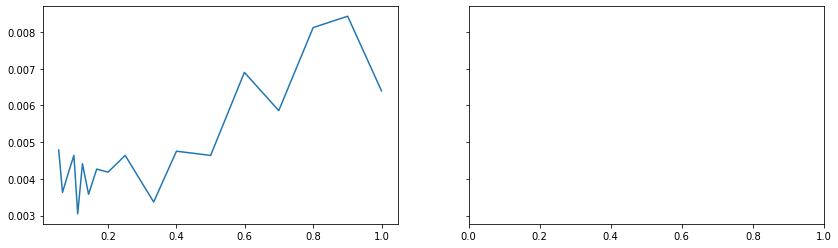

In [115]:
# UTILITY PLOT
fig, axs = plt.subplots(1,2, figsize=(14,4), sharey=True)

# RELATIVE LOSS
axs[0].plot(x, gb_rel_20, label='20 attributes marked')
axs[0].plot(x, gb_rel_16, label='16 attributes marked')
axs[0].plot(x, gb_rel_12, label='12 attributes marked')
axs[0].plot(x, gb_rel_8, label='8 attributes marked')
axs[0].plot(x, gb_rel_4, label='4 attributes marked')

# ABSOLUTE ACC
#axs[0].plot(x, utility_fp_gb_e80_avg_y, label='20 attributes marked')
#axs[0].plot(x, utility_fp_gb_fpattr16_e80_avg_y, label='16 attributes marked') 
#axs[0].plot(x, utility_fp_gb_fpattr12_e80_avg_y, label='12 attributes marked')
#axs[0].plot(x, utility_fp_gb_fpattr8_e80_avg_y, label='8 attributes marked')
#axs[0].plot(x, utility_fp_gb_fpattr4_e80_avg_y, label='4 attributes marked')

#axs[0].plot(x, gb_baseline_y, label='GB baseline')

axs[0].set_xlabel('% marks')
axs[0].set_ylabel('relative accuracy loss')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Gradient Boosting')

# RELATIVE LOSS
axs[1].plot(x, knn_rel_20, label='20 attributes marked')
axs[1].plot(x, knn_rel_16, label='16 attributes marked')
axs[1].plot(x, knn_rel_12, label='12 attributes marked')
axs[1].plot(x, knn_rel_8, label='8 attributes marked')
axs[1].plot(x, knn_rel_4, label='4 attributes marked')

# ABSOLUTE ACC
#axs[1].plot(x, utility_fp_knn_e80_avg_y, label='20 attributes marked')
#axs[1].plot(x, utility_fp_knn_fpattr16_e80_avg_y, label='16 attributes marked') 
#axs[1].plot(x, utility_fp_knn_fpattr12_e80_avg_y, label='12 attributes marked')
#axs[1].plot(x, utility_fp_knn_fpattr8_e80_avg_y, label='8 attributes marked')
#axs[1].plot(x, utility_fp_knn_fpattr4_e80_avg_y, label='4 attributes marked')

#axs[1].plot(x, knn_baseline_y, label='KNN baseline')

axs[1].set_xlabel('% marks')
#axs[1].set_ylabel('relative accuracy loss')
axs[1].legend()
axs[1].grid()
axs[1].set_title('k-Nearest Neighbours')

In [93]:
gb_baseline

0.768

In [94]:
knn_baseline

0.76

# Summary

Here we define the constraints in terms of robustness and utility from the data owner perspective, and according to them, we define eliminations of solutions in the solution space. 

For example, the first plot may show all considered discreete solutions, the second plot shows the solutions that meet robustness constraints, and finally the third one shows the solutions that meet all of the constraints.

Each and every solution (%rows_marked, #attributes_marked) contains properties:
- robustness against horizontal subset attack
- robustness against vertical subset attack
- robustness against flipping attack
- utility loss in accuracy on the best classifier
- utility loss in accuracy on the 2nd best classifier
- ...

In [100]:
solution = pd.DataFrame(columns=['%rows_marked',
                                 '#columns_marked',
                                 'robustness_horizontal', 
                                 'robustness_vertical', 
                                 'robustness_flipping', 
                                 'utility_best', 
                                 'utility_2nd_best'])
solution = solution.set_index(['%rows_marked','#columns_marked'])

In [109]:
solution.loc[pd.Series(0,0)] = [0,0,0,0,0]

TypeError: Index(...) must be called with a collection of some kind, 0 was passed

In [106]:
solution.append({'robustness_horizontal':0, 
                                 'robustness_vertical':0, 
                                 'robustness_flipping':0, 
                                 'utility_best':0, 
                                 'utility_2nd_best':0})

TypeError: Can only append a dict if ignore_index=True

In [101]:
solution

,,robustness_horizontal,robustness_vertical,robustness_flipping,utility_best,utility_2nd_best
%rows_marked,#columns_marked,,,,,


In [ ]:
contraint_robustness_flipping = 0.5

In [143]:
x

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.08333333, 0.06666667, 0.05555556])

In [147]:
gb_rel_20

[0.0063964843750001265,
 0.004638671875000031,
 0.003369140624999954,
 0.004638671875000031,
 0.004182942708333415,
 0.004264322916666703,
 0.003580729166666561,
 0.004410807291666651,
 0.0030436197916666567,
 0.004638671875000031,
 0.004150390625000013,
 0.0036295572916667366,
 0.004785156249999979]

In [148]:
y_summary = [4]*13 + [8]*13 + [12]*13 + [16]*13 + [20]*13
x_summary = [x]*5

In [149]:
y_elimination_1 = [4]*11 + [8]*12 + [12]*12 + [16]*13 + [20]*13
x_elimination_1 = np.concatenate([x[2:]] + [x[1:]] + [x[1:]] + [x]*2)

y_diff_1 = [4, 4, 8, 12]
x_diff_1 = [1.0, 0.5, 1.0, 1.0]

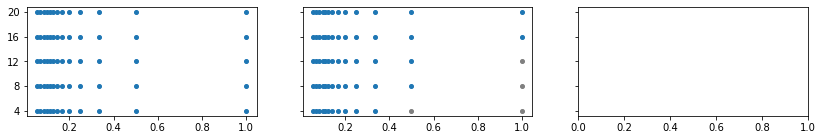

In [150]:
fig, axs = plt.subplots(1,3, figsize=(14,2), sharey=True)


axs[0].scatter(x_summary,y_summary,s=16)
axs[1].scatter(x_elimination_1, y_elimination_1, s=16)
axs[1].scatter(x_diff_1, y_diff_1, s=16, color='grey')

axs[0].set_yticks([4, 8, 12, 16, 20])